In [1]:
import json
import os
path_1 = 'data/rumor_covid_19/rumor_weibo'
path_2 = 'data/rumor_covid_19/rumor_forward_comment'
files_1 = os.listdir(path_1)
files_2 = os.listdir(path_2)

rumor_data = []
for file in files_1:
    with open(path_1+'/'+file, encoding='utf-8') as f:
        news = json.loads(f.readline())
        if file in files_2:
            with open(path_2+'/'+file, encoding='utf-8') as f:
                com_forw = json.loads(f.readline())
                news['forward_comment'] = com_forw
        rumor_data.append(news)

In [2]:
len(rumor_data)

324

In [3]:
import pandas as pd

rumor_data = pd.DataFrame(rumor_data)
rumor_data = rumor_data.dropna(subset=['rumorText'])
rumor_data.head()

,forward_comment,informerName,informerUrl,publishTime,related_url,result,rumorCode,rumorText,rumormongerName,rumormongerUrl,title,visitTimes
1,"[{'uid': '1904409377', 'text': '白起上神：转发微博', 'd...",独善一行,http://weibo.com/u/1365841235,2020-01-22,[{'url': 'http://weibo.com/n/%E5%A4%AE%E8%A7%8...,经查，此微博称“此次新型肺炎病毒传播途径是华南海鲜市场进口的豺—-一种犬科动物携带的病毒”不...,K1CaS7Qxd76ol,据最新研究发现，此次新型肺炎病毒传播途径是华南海鲜市场进口的豺—-一种犬科动物携带的病毒，然...,琳琅满目1876,http://weibo.com/1251393471/IqHmSy5e7?from=pag...,@独善一行 投诉@琳琅满目1876 不实信息,33
2,"[{'uid': '2689026872', 'text': 'CF的逗逼生活-范范：根据什...",用户7007066843,http://weibo.com/u/7007066843,2020-01-23,[{'url': 'http://weibo.com/n/%E5%A4%AE%E8%A7%8...,经查，此微博称“此次新型肺炎病毒传播途径是华南海鲜市场进口的豺—-一种犬科动物携带的病毒”不...,K1CaS7Q1c768i,据最新研究发现，此次新型肺炎病毒传播途径是华南海鲜市场进口的豺—-一种犬科动物携带的病毒，然...,快乐平68,http://weibo.com/2321456057/IqM32E8p5?from=pag...,@Mao_mtoo 投诉@快乐平68 不实信息,71
3,"[{'uid': '2147628052', 'text': 'wys_680：不会吧', ...",Bavetta,http://weibo.com/u/1869569294,2020-01-23,[{'url': 'http://weibo.com/n/%E4%BA%BA%E6%B0%9...,经查，此微博称“中部战区空军今天会在武汉上空开始播撒消毒粉液”不实，@人民日报：记者向武汉...,K1CaS7Qth7qgi,今天下午五点~九点，大家千万不要出门，全市转运发热病人到定点医院。切记切记。以免造成感染。<...,wys_680,http://weibo.com/2147628052/IqNk34Ppx?from=pag...,@Bavetta 投诉@wys_680 不实信息,26
4,"[{'uid': '3385461992', 'text': '童木木hera_进化中：官方...",青椒你吃小姐吗丶,http://weibo.com/u/5744208589,2020-01-23,[{'url': 'http://weibo.com/n/%E4%BA%BA%E6%B0%9...,经查，此微博称“中部战区空军今天会在武汉上空开始播撒消毒粉液”不实，@人民日报：记者向武汉...,K1CaS7Qth7qsf,说是今天要在武汉上空撒消毒粉液之后还要运转发热患者到定点医院。 ​​​​,童木木hera_进化中,http://weibo.com/3385461992/IqNnEpRY0?from=pag...,@青椒你吃小姐吗丶 投诉@童木木hera_进化中 不实信息,25
5,[],青椒你吃小姐吗丶,http://weibo.com/u/5744208589,2020-01-23,[{'url': 'http://weibo.com/n/%E4%BA%BA%E6%B0%9...,经查，此微博称“中部战区空军今天会在武汉上空开始播撒消毒粉液”不实，@人民日报：记者向武汉...,K1CaS7Qth7qsh,武汉“封城“隔离后并不是什么都不做，现在开始空中撒消毒粉液全城消毒了。<br>老百姓更在意的...,晨花暮叶,http://weibo.com/1844574044/IqNubicMt?from=pag...,@tao涛宝0315 投诉@晨花暮叶 不实信息,57


In [6]:
import jieba
import pandas as pd
import os
from collections import Counter
import re

path = 'data/emo_dict_final_dropdup'
files = os.listdir(path)
sent_dict = []
for file in files:
    position = path + '/' + file
    with open(position, 'r', encoding='utf-8-sig') as f:
        for word in f:
            word = word.strip()
            tup = (word, file[:-4])
            sent_dict.append(tup)
sent_dict = pd.DataFrame(sent_dict)
sent_dict.columns = ['word', 'emo']
print(Counter(sent_dict['emo']))

emotions = ['anger', 'disgust', 'joy', 'sadness', 'fear']
emo_dist = []
def key_word_emo(text):
    score = [0, 0, 0, 0, 0]
    text = text.strip()  #去前后的空格
    text = re.sub(r"[0-9\s+\.\!\/_,$%^*()?;；:-【】+\"\']+|[+——！，;:。？、~@#￥%……&*（）]+", " ", text) #去标点符号
    words = jieba.cut(text)
    length = 0
    for word in words:
        length += 1
        for e in range(5):
            if word in sent_dict['word'][sent_dict['emo'] == emotions[e]].values:
                score[e] += 1
            else:
                pass
    #计算情绪数量分布
    emo_dist.append(score)
    return score

rumor_data['emo_prob_kw'] = rumor_data['rumorText'].apply(key_word_emo)

In [ ]:
# 计算情绪数目分布
emo_df = pd.DataFrame(emo_dist)
emo_df.columns = ['anger_words', 'disgust_words', 'joy_words', 'sadness_words', 'fear_words']
rumor_data = rumor_data.reset_index(drop=True)
rumor_data[['anger_words', 'disgust_words', 'joy_words', 'sadness_words', 'fear_words']] = emo_df

In [ ]:
rumor_data[['anger_words', 'disgust_words', 'joy_words', 'sadness_words', 'fear_words']].describe()

In [24]:
import re
rumor_data['have_htag'] = rumor_data['rumorText'].apply(lambda t : (1 if re.search('#(.*?)#', t, re.M|re.I) is not None else 0))
rumor_data['have_url'] = rumor_data['rumorText'].apply(lambda t : (1 if re.search('http(.*?)', t, re.M|re.I) is not None else 0))
rumor_data.head()

,forward_comment,informerName,informerUrl,publishTime,related_url,result,rumorCode,rumorText,rumormongerName,rumormongerUrl,title,visitTimes,emo_prob_kw,anger_words,disgust_words,joy_words,sadness_words,fear_words,have_htag,have_url
0,"[{'uid': '1904409377', 'text': '白起上神：转发微博', 'd...",独善一行,http://weibo.com/u/1365841235,2020-01-22,[{'url': 'http://weibo.com/n/%E5%A4%AE%E8%A7%8...,经查，此微博称“此次新型肺炎病毒传播途径是华南海鲜市场进口的豺—-一种犬科动物携带的病毒”不...,K1CaS7Qxd76ol,据最新研究发现，此次新型肺炎病毒传播途径是华南海鲜市场进口的豺—-一种犬科动物携带的病毒，然...,琳琅满目1876,http://weibo.com/1251393471/IqHmSy5e7?from=pag...,@独善一行 投诉@琳琅满目1876 不实信息,33,"[0, 0, 1, 3, 6]",0,0,1,3,6,0,0
1,"[{'uid': '2689026872', 'text': 'CF的逗逼生活-范范：根据什...",用户7007066843,http://weibo.com/u/7007066843,2020-01-23,[{'url': 'http://weibo.com/n/%E5%A4%AE%E8%A7%8...,经查，此微博称“此次新型肺炎病毒传播途径是华南海鲜市场进口的豺—-一种犬科动物携带的病毒”不...,K1CaS7Q1c768i,据最新研究发现，此次新型肺炎病毒传播途径是华南海鲜市场进口的豺—-一种犬科动物携带的病毒，然...,快乐平68,http://weibo.com/2321456057/IqM32E8p5?from=pag...,@Mao_mtoo 投诉@快乐平68 不实信息,71,"[0, 0, 1, 3, 6]",0,0,1,3,6,0,0
2,"[{'uid': '2147628052', 'text': 'wys_680：不会吧', ...",Bavetta,http://weibo.com/u/1869569294,2020-01-23,[{'url': 'http://weibo.com/n/%E4%BA%BA%E6%B0%9...,经查，此微博称“中部战区空军今天会在武汉上空开始播撒消毒粉液”不实，@人民日报：记者向武汉...,K1CaS7Qth7qgi,今天下午五点~九点，大家千万不要出门，全市转运发热病人到定点医院。切记切记。以免造成感染。<...,wys_680,http://weibo.com/2147628052/IqNk34Ppx?from=pag...,@Bavetta 投诉@wys_680 不实信息,26,"[0, 0, 1, 0, 1]",0,0,1,0,1,0,0
3,"[{'uid': '3385461992', 'text': '童木木hera_进化中：官方...",青椒你吃小姐吗丶,http://weibo.com/u/5744208589,2020-01-23,[{'url': 'http://weibo.com/n/%E4%BA%BA%E6%B0%9...,经查，此微博称“中部战区空军今天会在武汉上空开始播撒消毒粉液”不实，@人民日报：记者向武汉...,K1CaS7Qth7qsf,说是今天要在武汉上空撒消毒粉液之后还要运转发热患者到定点医院。 ​​​​,童木木hera_进化中,http://weibo.com/3385461992/IqNnEpRY0?from=pag...,@青椒你吃小姐吗丶 投诉@童木木hera_进化中 不实信息,25,"[0, 0, 0, 0, 0]",0,0,0,0,0,0,0
4,[],青椒你吃小姐吗丶,http://weibo.com/u/5744208589,2020-01-23,[{'url': 'http://weibo.com/n/%E4%BA%BA%E6%B0%9...,经查，此微博称“中部战区空军今天会在武汉上空开始播撒消毒粉液”不实，@人民日报：记者向武汉...,K1CaS7Qth7qsh,武汉“封城“隔离后并不是什么都不做，现在开始空中撒消毒粉液全城消毒了。<br>老百姓更在意的...,晨花暮叶,http://weibo.com/1844574044/IqNubicMt?from=pag...,@tao涛宝0315 投诉@晨花暮叶 不实信息,57,"[0, 0, 3, 1, 0]",0,0,3,1,0,0,0


In [26]:
rumor_data['have_date'] = rumor_data['rumorText'].apply(lambda t : (1 if re.search('[年月日](.*?)', t, re.M|re.I) is not None else 0))
rumor_data.head()

,forward_comment,informerName,informerUrl,publishTime,related_url,result,rumorCode,rumorText,rumormongerName,rumormongerUrl,...,visitTimes,emo_prob_kw,anger_words,disgust_words,joy_words,sadness_words,fear_words,have_htag,have_url,have_date
0,"[{'uid': '1904409377', 'text': '白起上神：转发微博', 'd...",独善一行,http://weibo.com/u/1365841235,2020-01-22,[{'url': 'http://weibo.com/n/%E5%A4%AE%E8%A7%8...,经查，此微博称“此次新型肺炎病毒传播途径是华南海鲜市场进口的豺—-一种犬科动物携带的病毒”不...,K1CaS7Qxd76ol,据最新研究发现，此次新型肺炎病毒传播途径是华南海鲜市场进口的豺—-一种犬科动物携带的病毒，然...,琳琅满目1876,http://weibo.com/1251393471/IqHmSy5e7?from=pag...,...,33,"[0, 0, 1, 3, 6]",0,0,1,3,6,0,0,0
1,"[{'uid': '2689026872', 'text': 'CF的逗逼生活-范范：根据什...",用户7007066843,http://weibo.com/u/7007066843,2020-01-23,[{'url': 'http://weibo.com/n/%E5%A4%AE%E8%A7%8...,经查，此微博称“此次新型肺炎病毒传播途径是华南海鲜市场进口的豺—-一种犬科动物携带的病毒”不...,K1CaS7Q1c768i,据最新研究发现，此次新型肺炎病毒传播途径是华南海鲜市场进口的豺—-一种犬科动物携带的病毒，然...,快乐平68,http://weibo.com/2321456057/IqM32E8p5?from=pag...,...,71,"[0, 0, 1, 3, 6]",0,0,1,3,6,0,0,0
2,"[{'uid': '2147628052', 'text': 'wys_680：不会吧', ...",Bavetta,http://weibo.com/u/1869569294,2020-01-23,[{'url': 'http://weibo.com/n/%E4%BA%BA%E6%B0%9...,经查，此微博称“中部战区空军今天会在武汉上空开始播撒消毒粉液”不实，@人民日报：记者向武汉...,K1CaS7Qth7qgi,今天下午五点~九点，大家千万不要出门，全市转运发热病人到定点医院。切记切记。以免造成感染。<...,wys_680,http://weibo.com/2147628052/IqNk34Ppx?from=pag...,...,26,"[0, 0, 1, 0, 1]",0,0,1,0,1,0,0,0
3,"[{'uid': '3385461992', 'text': '童木木hera_进化中：官方...",青椒你吃小姐吗丶,http://weibo.com/u/5744208589,2020-01-23,[{'url': 'http://weibo.com/n/%E4%BA%BA%E6%B0%9...,经查，此微博称“中部战区空军今天会在武汉上空开始播撒消毒粉液”不实，@人民日报：记者向武汉...,K1CaS7Qth7qsf,说是今天要在武汉上空撒消毒粉液之后还要运转发热患者到定点医院。 ​​​​,童木木hera_进化中,http://weibo.com/3385461992/IqNnEpRY0?from=pag...,...,25,"[0, 0, 0, 0, 0]",0,0,0,0,0,0,0,0
4,[],青椒你吃小姐吗丶,http://weibo.com/u/5744208589,2020-01-23,[{'url': 'http://weibo.com/n/%E4%BA%BA%E6%B0%9...,经查，此微博称“中部战区空军今天会在武汉上空开始播撒消毒粉液”不实，@人民日报：记者向武汉...,K1CaS7Qth7qsh,武汉“封城“隔离后并不是什么都不做，现在开始空中撒消毒粉液全城消毒了。<br>老百姓更在意的...,晨花暮叶,http://weibo.com/1844574044/IqNubicMt?from=pag...,...,57,"[0, 0, 3, 1, 0]",0,0,3,1,0,0,0,0


In [27]:
rumor_data['have_at'] = rumor_data['rumorText'].apply(lambda t : (1 if re.search('@(.*)', t, re.M|re.I) is not None else 0))

In [28]:
with open('data/pro_city.json', 'r', encoding='utf-8') as file:
    china_data = json.load(file)

prov = []
for i in range(len(china_data)):
    prov.append(china_data[i]['name'])

city = []
for i in range(len(china_data)):
    for j in range(len(china_data[i]['city'])):
        city.append(china_data[i]['city'][j]['name'])
        
area = []
for i in range(len(china_data)):
    for j in range(len(china_data[i]['city'])):
        area += china_data[i]['city'][j]['area']

print(len(prov), len(city), len(area))

area = [a for a in area if a != '其他']

34 391 3227


In [29]:
def loc(text):
    res = 0
    for i in range(len(prov)):
        if re.search(prov[i], text, re.S) is not None:
            res = 1
            break
        else:
            pass
    if res == 1:
        pass
    else:
        for j in range(len(city)):
            if re.search(city[j], text, re.S) is not None:
                res = 1
                break
            else:
                pass
    if res == 1:
        pass
    else:
        for k in range(len(area)):
            if re.search(area[k], text, re.S) is not None:
                res = 1
                break
            else:
                pass
    return res
                
rumor_data['have_loc'] = rumor_data['rumorText'].apply(loc)
rumor_data.head()

,forward_comment,informerName,informerUrl,publishTime,related_url,result,rumorCode,rumorText,rumormongerName,rumormongerUrl,...,anger_words,disgust_words,joy_words,sadness_words,fear_words,have_htag,have_url,have_date,have_at,have_loc
0,"[{'uid': '1904409377', 'text': '白起上神：转发微博', 'd...",独善一行,http://weibo.com/u/1365841235,2020-01-22,[{'url': 'http://weibo.com/n/%E5%A4%AE%E8%A7%8...,经查，此微博称“此次新型肺炎病毒传播途径是华南海鲜市场进口的豺—-一种犬科动物携带的病毒”不...,K1CaS7Qxd76ol,据最新研究发现，此次新型肺炎病毒传播途径是华南海鲜市场进口的豺—-一种犬科动物携带的病毒，然...,琳琅满目1876,http://weibo.com/1251393471/IqHmSy5e7?from=pag...,...,0,0,1,3,6,0,0,0,0,0
1,"[{'uid': '2689026872', 'text': 'CF的逗逼生活-范范：根据什...",用户7007066843,http://weibo.com/u/7007066843,2020-01-23,[{'url': 'http://weibo.com/n/%E5%A4%AE%E8%A7%8...,经查，此微博称“此次新型肺炎病毒传播途径是华南海鲜市场进口的豺—-一种犬科动物携带的病毒”不...,K1CaS7Q1c768i,据最新研究发现，此次新型肺炎病毒传播途径是华南海鲜市场进口的豺—-一种犬科动物携带的病毒，然...,快乐平68,http://weibo.com/2321456057/IqM32E8p5?from=pag...,...,0,0,1,3,6,0,0,0,0,0
2,"[{'uid': '2147628052', 'text': 'wys_680：不会吧', ...",Bavetta,http://weibo.com/u/1869569294,2020-01-23,[{'url': 'http://weibo.com/n/%E4%BA%BA%E6%B0%9...,经查，此微博称“中部战区空军今天会在武汉上空开始播撒消毒粉液”不实，@人民日报：记者向武汉...,K1CaS7Qth7qgi,今天下午五点~九点，大家千万不要出门，全市转运发热病人到定点医院。切记切记。以免造成感染。<...,wys_680,http://weibo.com/2147628052/IqNk34Ppx?from=pag...,...,0,0,1,0,1,0,0,0,0,0
3,"[{'uid': '3385461992', 'text': '童木木hera_进化中：官方...",青椒你吃小姐吗丶,http://weibo.com/u/5744208589,2020-01-23,[{'url': 'http://weibo.com/n/%E4%BA%BA%E6%B0%9...,经查，此微博称“中部战区空军今天会在武汉上空开始播撒消毒粉液”不实，@人民日报：记者向武汉...,K1CaS7Qth7qsf,说是今天要在武汉上空撒消毒粉液之后还要运转发热患者到定点医院。 ​​​​,童木木hera_进化中,http://weibo.com/3385461992/IqNnEpRY0?from=pag...,...,0,0,0,0,0,0,0,0,0,0
4,[],青椒你吃小姐吗丶,http://weibo.com/u/5744208589,2020-01-23,[{'url': 'http://weibo.com/n/%E4%BA%BA%E6%B0%9...,经查，此微博称“中部战区空军今天会在武汉上空开始播撒消毒粉液”不实，@人民日报：记者向武汉...,K1CaS7Qth7qsh,武汉“封城“隔离后并不是什么都不做，现在开始空中撒消毒粉液全城消毒了。<br>老百姓更在意的...,晨花暮叶,http://weibo.com/1844574044/IqNubicMt?from=pag...,...,0,0,3,1,0,0,0,0,0,0


In [30]:
def text_length(text):
    text = text.strip()  #去前后的空格
    text = re.sub(r"[0-9\s+\.\!\/_,$%^*()?;；:-【】+\"\']+|[+——！，;:。？、~@#￥%……&*（）]+", " ", text) #去标点符号
    words = jieba.cut(text)
    ws = []
    for word in words:
        ws.append(word)
    s = ' '.join(ws)
    return len(s)

rumor_data['text_len'] = rumor_data['rumorText'].apply(text_length)

In [35]:
emo_words = rumor_data[['anger_words', 'disgust_words', 'joy_words', 'sadness_words', 'fear_words']]
emo_ratio = emo_words.T/emo_words.T.sum()
rumor_data[['anger', 'disgust', 'joy', 'sadness', 'fear']] = emo_ratio.T

In [37]:
rumor_data = rumor_data[rumor_data['words_count']!=0]
rumor_data.shape

(207, 30)

In [38]:
rumor_data.to_csv('data/covid_19.csv', index=False)

In [51]:
rumor_data = rumor_data.dropna(subset=['forward_comment'])
rumor_data['com_or_rep'] = rumor_data['forward_comment'].apply(lambda d: len(d))

In [56]:
def repost(data):
    num = 0
    for each in data:
        if each['comment_or_forward'] == 'forward':
            num+=1
        else:
            pass
    return num

rumor_data['repostnum'] = rumor_data['forward_comment'].apply(repost)

In [57]:
rumor_data.to_csv('data/covid_19_2.csv', index=False)

In [7]:
import pandas as pd
rumor_data = pd.read_csv('data/covid_19_2.csv')
rumor_data.head()

,forward_comment,informerName,informerUrl,publishTime,related_url,result,rumorCode,rumorText,rumormongerName,rumormongerUrl,...,have_loc,text_len,words_count,anger,disgust,joy,sadness,fear,com_or_rep,repostnum
0,"[{'uid': '1904409377', 'text': '白起上神：转发微博', 'd...",独善一行,http://weibo.com/u/1365841235,2020-01-22,[{'url': 'http://weibo.com/n/%E5%A4%AE%E8%A7%8...,经查，此微博称“此次新型肺炎病毒传播途径是华南海鲜市场进口的豺—-一种犬科动物携带的病毒”不...,K1CaS7Qxd76ol,据最新研究发现，此次新型肺炎病毒传播途径是华南海鲜市场进口的豺—-一种犬科动物携带的病毒，然...,琳琅满目1876,http://weibo.com/1251393471/IqHmSy5e7?from=pag...,...,0,463,10,0.0,0.0,0.10,0.30,0.6,2,1
1,"[{'uid': '2689026872', 'text': 'CF的逗逼生活-范范：根据什...",用户7007066843,http://weibo.com/u/7007066843,2020-01-23,[{'url': 'http://weibo.com/n/%E5%A4%AE%E8%A7%8...,经查，此微博称“此次新型肺炎病毒传播途径是华南海鲜市场进口的豺—-一种犬科动物携带的病毒”不...,K1CaS7Q1c768i,据最新研究发现，此次新型肺炎病毒传播途径是华南海鲜市场进口的豺—-一种犬科动物携带的病毒，然...,快乐平68,http://weibo.com/2321456057/IqM32E8p5?from=pag...,...,0,459,10,0.0,0.0,0.10,0.30,0.6,18,0
2,"[{'uid': '2147628052', 'text': 'wys_680：不会吧', ...",Bavetta,http://weibo.com/u/1869569294,2020-01-23,[{'url': 'http://weibo.com/n/%E4%BA%BA%E6%B0%9...,经查，此微博称“中部战区空军今天会在武汉上空开始播撒消毒粉液”不实，@人民日报：记者向武汉...,K1CaS7Qth7qgi,今天下午五点~九点，大家千万不要出门，全市转运发热病人到定点医院。切记切记。以免造成感染。<...,wys_680,http://weibo.com/2147628052/IqNk34Ppx?from=pag...,...,0,195,2,0.0,0.0,0.50,0.00,0.5,4,0
3,[],青椒你吃小姐吗丶,http://weibo.com/u/5744208589,2020-01-23,[{'url': 'http://weibo.com/n/%E4%BA%BA%E6%B0%9...,经查，此微博称“中部战区空军今天会在武汉上空开始播撒消毒粉液”不实，@人民日报：记者向武汉...,K1CaS7Qth7qsh,武汉“封城“隔离后并不是什么都不做，现在开始空中撒消毒粉液全城消毒了。<br>老百姓更在意的...,晨花暮叶,http://weibo.com/1844574044/IqNubicMt?from=pag...,...,0,264,4,0.0,0.0,0.75,0.25,0.0,0,0
4,"[{'uid': '3754667265', 'text': '唔再睡一会儿：是吗？有确切新...",Y_悲歌,http://weibo.com/u/6689781491,2020-01-23,[{'url': 'http://weibo.com/n/%E4%BA%BA%E6%B0%9...,经查，此微博称“中部战区空军今天会在武汉上空开始播撒消毒粉液”不实，@人民日报：记者向武汉市...,K1CaS7Qth7qYh,今天下午五点~九点，大家千万不要出门，全市转运发热病人到定点医院。切记切记。以免造成感染。<...,vigro0,http://weibo.com/1845863507/IqNpk8Kit?from=pag...,...,0,205,1,0.0,0.0,0.00,0.00,1.0,12,0


In [8]:
rumor_data.shape

(200, 32)

In [9]:
rumor_data[['anger', 'disgust', 'joy', 'sadness', 'fear']].describe()

,anger,disgust,joy,sadness,fear
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.118751,0.078576,0.342630,0.132952,0.327091
std,0.266358,0.224896,0.383219,0.255205,0.387231
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.183333,0.000000,0.166667
75%,0.000000,0.000000,0.666667,0.142857,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
rumor_data['diff'] = rumor_data['anger'] - rumor_data['joy']

In [11]:
H = rumor_data[rumor_data['repostnum']>=10]
H[['anger', 'disgust', 'joy', 'sadness', 'fear', 'diff']].describe()

,anger,disgust,joy,sadness,fear,diff
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,0.145137,0.154795,0.268133,0.151615,0.280320,-0.122996
std,0.306189,0.310037,0.330733,0.258752,0.342644,0.500691
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000
50%,0.000000,0.000000,0.105556,0.000000,0.125000,0.000000
75%,0.000000,0.121528,0.500000,0.232955,0.500000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
L = rumor_data[rumor_data['repostnum']<10]
L[['anger', 'disgust', 'joy', 'sadness', 'fear', 'diff']].describe()

,anger,disgust,joy,sadness,fear,diff
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.108992,0.050385,0.370184,0.126049,0.344389,-0.261192
std,0.250490,0.176962,0.398416,0.254430,0.402195,0.519583
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-0.666667
50%,0.000000,0.000000,0.267857,0.000000,0.166667,-0.100000
75%,0.000000,0.000000,0.666667,0.124552,0.600000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


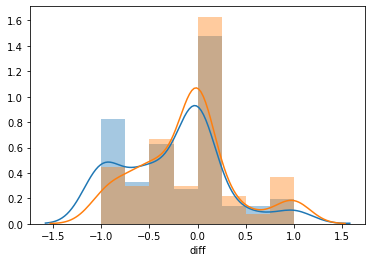

In [250]:
sns.distplot(L['diff'])
sns.distplot(H['diff'])

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_pdf(data_list, labels, sname):
    font1 = {
        'weight' : 'normal',
        'size'   : 18,
    }
    font2 = {
        'weight' : 'normal',
        'size'   : 14,
    }
    plt.style.use('default')
    for i in range(len(data_list)):
        sns.distplot(data_list[i]['diff'], 
                     hist=False, 
                     kde_kws={"lw": 3, "shade": False}, 
                     label=labels[i])

    plt.xlabel('Anger-Joy', font1, color = 'black')
    plt.ylabel('PDF', font1, color = 'black')
    plt.tick_params(labelsize=14, colors='black')
    plt.legend(prop=font1)
    plt.tight_layout()
    plt.savefig('images/covid-pdf-'+ sname + '.pdf')
    plt.savefig('images/covid-pdf-'+ sname + '.jpg', dpi=600)
    plt.show()

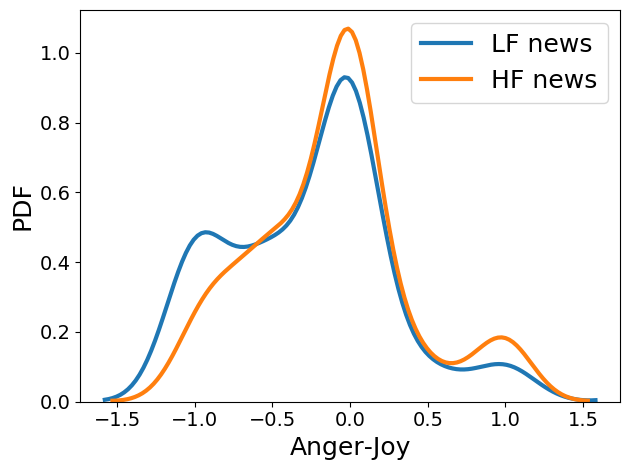

In [21]:
plot_pdf([L,H],['LF news', 'HF news'], sname='diff')

In [255]:
H['rumorText'][57]

'已经报警 涉事微商被处以15日治安拘留 <a target="_blank" render="ext" suda-uatrack="key=topic_click&value=click_topic" class="a_topic" extra-data="type=topic" href="//s.weibo.com/weibo?q=%23%E6%96%B0%E5%9E%8B%E5%86%A0%E7%8A%B6%E7%97%85%E6%AF%92%23&from=default">#新型冠状病毒#</a>\xa0\xa0\xa0<a suda-uatrack="key=tblog_card&value=click_title:4466180108652839:1034-video:1034%3A4466179981377579:weibodetail:6154171029:4466180108652839:6154171029" title="马文先生的微博视频" href="http://t.cn/A6PXAHmi" alt="http://t.cn/A6PXAHmi" action-type="feed_list_url" target="_blank" rel="noopener noreferrer"><i class="W_ficon ficon_cd_video">L</i>马文先生的微博视频</a> （<a target="_blank" render="ext" extra-data="type=atname" href="//weibo.com/n/%E9%A1%BA%E4%B8%B0%E9%9B%86%E5%9B%A2?from=feed&loc=at" usercard="name=顺丰集团">@顺丰集团</a> 发微博 说明：倒卖口罩的微商利用顺丰的快递站点 作为拍摄视频道具 视频中称截获境外发至中国的口罩快递 并兜售\xa0\xa0在场顺丰员工当面未阻止 <a target="_blank" render="ext" extra-data="type=atname" href="//weibo.com/n/%E9%A1%BA%E4%B8%B0%E5%AE%98%E6%96%B9%E5%AE%A2%E6%9C%8D?from=feed&l

In [258]:
H['rumorText'][262]

'【华春莹:那些<a target="_blank" render="ext" suda-uatrack="key=topic_click&value=click_topic" class="a_topic" extra-data="type=topic" href="//s.weibo.com/weibo?q=%23%E8%83%8C%E5%8F%9B%E7%A5%96%E5%9B%BD%E7%9A%84%E6%98%8E%E6%98%9F%E7%A6%81%E6%AD%A2%E4%BD%BF%E7%94%A8%E4%B8%AD%E5%9B%BD%E6%8A%A4%E7%85%A7%23&from=default">#背叛祖国的明星禁止使用中国护照#</a>】加入外国国籍的中国明星，请不要再来中国赚钱了哦，有新规，加入外国国籍，自动放弃中国国籍，吴亦凡，刘亦菲，李连杰等在列。<a target="_blank" render="ext" suda-uatrack="key=topic_click&value=click_topic" class="a_topic" extra-data="type=topic" href="//s.weibo.com/weibo?q=%23%E5%8D%9A%E7%88%B1%E7%B2%BE%E7%A5%9E%23&from=default">#博爱精神#</a><a target="_blank" render="ext" suda-uatrack="key=topic_click&value=click_topic" class="a_topic" extra-data="type=topic" href="//s.weibo.com/weibo?q=%23%E8%82%96%E6%88%98%E5%B7%A5%E4%BD%9C%E5%AE%A4%E9%81%93%E6%AD%89%23&from=default">#肖战工作室道歉#</a> <a suda-uatrack="key=tblog_card&value=click_title:4477868963207808:1034-video:1034%3A4477868844187656:weibodetail:1074273855:4477868963207808:1

In [260]:
H['rumorText'][175]

'可怕 \u200b\u200b\u200b\u200b'

In [149]:
sub = rumor_data[['rumorCode', 'emo_prob_kw', 'anger_words','disgust_words', 'joy_words', 'sadness_words', 'fear_words',
            'have_htag', 'have_url', 'have_date', 'have_at', 'have_loc', 'text_len',
            'words_count', 'anger', 'disgust', 'joy', 'sadness', 'fear',
            'com_or_rep', 'repostnum']]
sub.to_csv('covid_19_R.csv', index=False)

In [150]:
sub.head()

,rumorCode,emo_prob_kw,anger_words,disgust_words,joy_words,sadness_words,fear_words,have_htag,have_url,have_date,...,have_loc,text_len,words_count,anger,disgust,joy,sadness,fear,com_or_rep,repostnum
0,K1CaS7Qxd76ol,"[0, 0, 1, 3, 6]",0,0,1,3,6,0,0,0,...,0,463,10,0.0,0.0,0.10,0.30,0.6,2,1
1,K1CaS7Q1c768i,"[0, 0, 1, 3, 6]",0,0,1,3,6,0,0,0,...,0,459,10,0.0,0.0,0.10,0.30,0.6,18,0
2,K1CaS7Qth7qgi,"[0, 0, 1, 0, 1]",0,0,1,0,1,0,0,0,...,0,195,2,0.0,0.0,0.50,0.00,0.5,4,0
4,K1CaS7Qth7qsh,"[0, 0, 3, 1, 0]",0,0,3,1,0,0,0,0,...,0,264,4,0.0,0.0,0.75,0.25,0.0,0,0
5,K1CaS7Qth7qYh,"[0, 0, 0, 0, 1]",0,0,0,0,1,0,1,0,...,0,205,1,0.0,0.0,0.00,0.00,1.0,12,0


Ks_2sampResult(statistic=0.07527097551184263, pvalue=0.9120187662599312)

In [119]:
import re
import jieba
import jieba.posseg as peg

word_list = []
def seg_sentence(s):
    s = s.strip()  #去前后的空格
    s = re.sub(r"[0-9\s+\.\!\/_,$%^*()?;；:-【】+\"\']+|[+——！，;:。？、~@#￥%……&*（）]+", " ", s) #去标点符号
    words = peg.cut(s)
    for word, flag in words:
            word_list.append(word)
rumor_data['rumorText'].apply(seg_sentence)
word_list = list(set(word_list))
len(word_list)

3110

In [121]:
def pos(word):
    s = peg.cut(word)
    f = ''
    for word, flag in s:
        f = flag
    if f in ['n', 'v', 'vd', 'vn', 'a', 'ad', 'an']:
        pass
    else:
        f ='NAN'
    return f

word_list = [word for word in word_list if pos(word)!='NAN']
len(word_list)

1938

In [125]:
word_list = [word for word in word_list if word not in sent_dict['word'].get_values()]

In [126]:
len(word_list)

1718

In [128]:
with open('data/word_list_covid_19.txt', 'a', encoding='utf-8') as f:
    for word in word_list:
        f.write(word+'\n')

In [26]:
import re
from collections import Counter

rumor_data['fake'] = rumor_data['result'].apply(lambda s: 1 if re.match('.*?不实.*?', s, re.S) else 0)
Counter(rumor_data['fake'])

Counter({1: 200})

In [27]:
rumor_data['result'][rumor_data['fake']==0]

Series([], Name: result, dtype: object)